## OpenCV-Python

- pip install opencv-python

### cv2
- .imread() : 파일을 불러옴
- .namedWindow() : 새 창의 이름을 설정
- .imshow() : 새 창 열기
- .waitKey() : 키보드 입력이 있을 때까지 대기 (키의 아스키코드값을 반환)
- .destroyAllWindows() : 생성된 모든 창을 닫음

In [3]:
import sys
import cv2

print('Hello OpenCV', cv2.__version__)

img = cv2.imread('cat.bmp')

if img is None:
    print('Image load failed')
    sys.exit()
    
cv2.namedWindow('image')
cv2.imshow('image',img)

while True:
    if cv2.waitKey() == 27:
        break
    
cv2.destroyAllWindows()

Hello OpenCV 4.11.0


### 영상 파일 불러오기

- cv2.imread(filename, flags=None)  -> retval
- filename : 불러올 파일 이름
- flags : 영상 파일 불러오기 옵션 플래그
- - IMREAD_COLOR : BGR 컬러 영상으로 읽기(기본값) shape = (rows, cals, 3)
- - IMREAD_GRAYSCALE : 그레이스케일 영상으로 읽기 shape = (rows, cals)
- - IMREAD_UNCHAGED : 영상 파일 속성 그대로 읽기 (ex) 투명한 png 파일 : shape = (rows, cals, 4)
- retval : 불러온 영상 데이터 (numpy.ndarray)

<br>
<hr>
<br>

### 영상 파일 저장하기
- cv2.imwrite(filename, img, params=None) -> retval
- img : 저장할 영상 데이터(numpy.ndarray)
- params : 파일 저장 옵션 지정(속성 & 값의 정수 쌍) (ex) [cv2.IMWRITE_JPEG_QUALITY,90] : JPG 파일 압축률을 90%로 지정
- retval : 정상적으로 저장되면 true, 실패하면 false

<br>
<hr>
<br>

### 새 창 띄우기
- cv2.namedWindow(winname, flags=None) -> None
- winname : 창 고유 이름
- flags : 창 속성 지정 플래스
- - cv2.WINDOW_NORMAL : 영상 크기를 창 크기에 맞게 지정
- - cv2.WINDOW_AUTOSIZE : 창 크기를 영상 크기에 맞게 변겅(기본값)


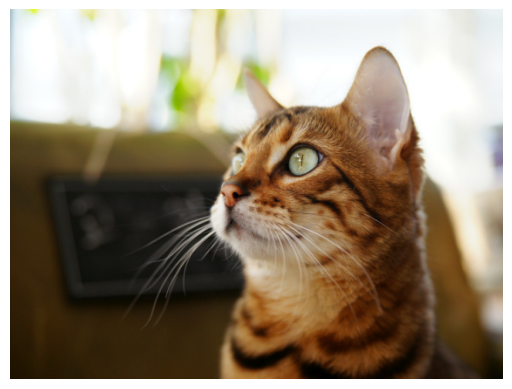

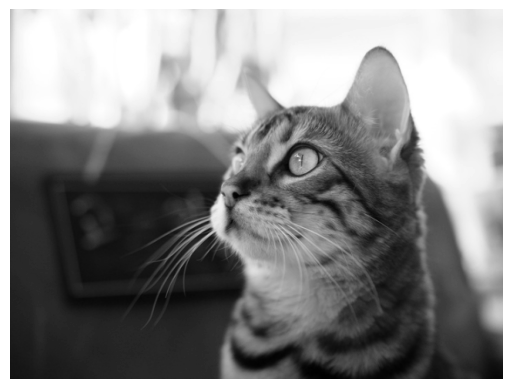

In [9]:
import matplotlib.pyplot as plt
import cv2

imgBGR = cv2.imread('cat.bmp')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(imgRGB) # imread()하면 BGR로 가져와서 색이 이상함 RGB로 변환해줘야함.
plt.show()

imgGray = cv2.imread('cat.bmp', cv2.IMREAD_GRAYSCALE)

plt.axis('off')
plt.imshow(imgGray, cmap='gray') # cmap= 'gray'를 안주면 이상한 색이 나옴
plt.show()

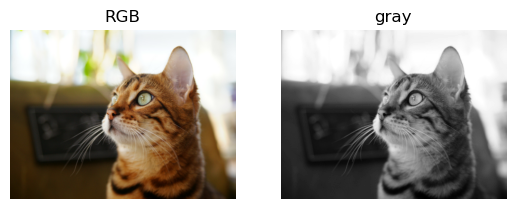

In [19]:
# Matplotlib으로 창 하나에 여러 개의 이미지 출력

imgBGR = cv2.imread('cat.bmp')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
imgGray = cv2.imread('cat.bmp', cv2.IMREAD_GRAYSCALE)

plt.subplot(121), plt.axis('off'), plt.imshow(imgRGB), plt.title('RGB')
plt.subplot(122), plt.axis('off'), plt.imshow(imgGray, cmap='gray', label= 'gray'), plt.title('gray')
plt.show()

## [실전 코딩] 이미지 슬라이드 쇼

- 이미지 슬라이드 쇼
- - 특정 폴더에 있는 모든 이미지 파일을 이용하여 슬라이드쇼를 수행

- 구현 할 기능
- - 특정 폴더에 있는 이미지 파일 목록 읽기
- - 이미지를 전체 화면으로 출력하기
- - 일정 시간동안 이미지를 화면에 출력하고, 다음 이미지로 교체하기 (무한루프)

### 특정 폴더에 있는 이미지 파일(*.jpg) 목록 읽기
- os.listdir()
- glob.glob()

In [1]:
import cv2
# os
# import os 

# file_list = os.listdir('.\\images')
# img_files = [os.path.join('.\\images', file) for file in file_list if file.endswith('.jpg')] 

# glob
import glob
img_files = glob.glob('.\\images\\*.jpg')

cv2.namedWindow('img_slide', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('img_slide', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

# 불러온 이미지를 반복적으로 출력
cnt = len(img_files)
idx = 0

# delay_time = 1000
# paused = True
while True :
    # key = cv2.waitKey(delay_time)  
    img = cv2.imread(img_files[idx])
    
    if img is None:
        print('Image load failed')
        break
    
    cv2.imshow('img_slide', img)
    # if key == 27: # esc
    #     paused = False
    # elif key == 32: # space
    #     paused = True
    # elif key == 81: # 왼쪽 방향키
    #     delay_time - 100
    # elif key == 83: # 오른쪽 방향키
    #     delay_time + 100
    
    if cv2.waitKey(1000) == 27:
        cv2.destroyAllWindows()
        break
        
    idx += 1
    if idx >= cnt:
        idx = 0

In [ ]:
img1 = cv2.imread("cat.bmp", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("cat.bmp", cv2.IMREAD_COLOR)
print(
    f"img1(gray) ndim : {img1.ndim} , shape : {img1.shape} , size : {img1.size} , dtype : {img1.dtype}"
)
print(
    f"img2(color) ndim : {img2.ndim} , shape : {img2.shape} , size : {img2.size} , dtype : {img2.dtype}"
)

print(img1) # 2차원 배열
print('='*40)
print(img2) # 3차원 배열

img1(gray) ndim : 2 , shape : (480, 640) , size : 307200 , dtype : uint8
img2(color) ndim : 3 , shape : (480, 640, 3) , size : 921600 , dtype : uint8
[[184 190 196 ... 241 241 241]
 [186 191 197 ... 241 241 241]
 [186 191 198 ... 241 241 241]
 ...
 [ 17  18  20 ...  10  11  10]
 [ 18  19  19 ...  10  11  10]
 [ 18  17  17 ...  10  11  10]]
[[[191 190 170]
  [199 195 176]
  [205 201 182]
  ...
  [244 242 237]
  [244 242 237]
  [244 242 237]]

 [[193 192 172]
  [200 196 177]
  [207 202 183]
  ...
  [244 242 237]
  [244 242 237]
  [244 242 237]]

 [[194 192 172]
  [200 196 177]
  [207 203 184]
  ...
  [244 242 237]
  [244 242 237]
  [244 242 237]]

 ...

 [[  0  15  28]
  [  0  16  29]
  [  2  18  30]
  ...
  [  3  10  13]
  [  4  11  14]
  [  3  10  12]]

 [[  0  17  27]
  [  1  17  29]
  [  1  17  29]
  ...
  [  2  11  12]
  [  3  11  13]
  [  2  10  13]]

 [[  0  17  27]
  [  0  15  27]
  [  0  15  27]
  ...
  [  1  12  11]
  [  3  11  13]
  [  3  10  14]]]


In [4]:
img1 = cv2.imread('cat.bmp', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('cat.bmp', cv2.IMREAD_COLOR)

print(f'type9img1) : {type(img1)}') # numpy.ndarray
print(f'img1.shape : {img1.shape}') # (480, 640)
print(f'img2.shape : {img2.shape}') # (480, 640, 3)
print(f'img2.dtype : {img2.dtype}') # uint8

h, w = img2.shape[:2] # h:480, w : 640
print(f'img2.size : {w} x {h}')

if len(img1.shape) == 2:
    print('img1 is a grayscale image')
    
elif len(img1.shape) == 3:
    print('img1 is a truecolor image')
    
    
if len(img2.shape) == 2:
    print('img1 is a grayscale image')
    
elif len(img2.shape) == 3:
    print('img1 is a truecolor image')

type9img1) : <class 'numpy.ndarray'>
img1.shape : (480, 640)
img2.shape : (480, 640, 3)
img2.dtype : uint8
img2.size : 640 x 480
img1 is a grayscale image
img1 is a truecolor image


In [36]:
img1 = cv2.imread('cat.bmp', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('cat.bmp', cv2.IMREAD_COLOR)

h, w = img1.shape
# for 문으로 픽셀값을 변경하는 작업은 매우 느리므로, 픽셀값 참조 방법만 확인하고 실제로는 사용 금지
for y in range(h):
    for x in range(w) :
        img1[y, x] = 255 # white
        img2[y, x] = [0, 0, 255] # BGR -> 0,0,255 -> red
        
cv2.namedWindow('img1')
cv2.namedWindow('img2')
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)


cv2.waitKey() # 이걸 줘야 실제로 출력아 가능함..?
cv2.destroyAllWindows()

### 영상의 생성, 복사, 부분 영상 추출

In [25]:
import numpy as np

np1 = np.empty((2,2), dtype='uint8')
np1_2 = np.empty((2,2), dtype=np.uint8)
np1_3 = np.empty((2,2), np.uint8)
print(np1)
print(np1_2)
print(np1_3)

np2 = np.zeros((2,2), dtype='uint8')
print(np2)

np3 = np.ones((2,2), np.uint8)
print(np3)

np4 = np.full((2,2), 255, np.uint8)
print(np4)

[[255 255]
 [255 255]]
[[255 255]
 [255 255]]
[[255 255]
 [255 255]]
[[0 0]
 [0 0]]
[[1 1]
 [1 1]]
[[255 255]
 [255 255]]


(<Axes: title={'center': 'img4'}>,
 (0.0, 1.0, 0.0, 1.0),
 Text(0.5, 1.0, 'img4'))

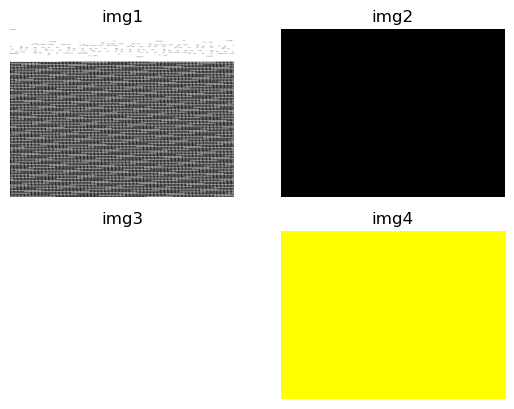

In [45]:
import matplotlib.pyplot as plt

img1 = np.empty((480, 640), dtype=np.uint8) # grayscale img
img2 = np.zeros((480, 640, 3), dtype=np.uint8) # color img
img3 = np.ones((480, 640), np.uint8) * 255 # white
img4 = np.full((480, 640, 3), (255, 255, 0), np.uint8) # yellow

# axis('off') : 축 안보이게
plt.subplot(221), plt.axis('off'), plt.imshow(img1, cmap='gray'), plt.title('img1')
plt.subplot(222), plt.axis('off'), plt.imshow(img2), plt.title('img2')
plt.subplot(223), plt.axis('off'), plt.imshow(img3, cmap='gray', vmin=0, vmax=255), plt.title('img3')
plt.subplot(224), plt.axis('off'), plt.imshow(img4), plt.title('img4')
